# Animated Movie Analysis


## Environment Set-up

First, we need to set up our environment by importing the **pandas**, **numpy**, **math**, and **matplotlib** libraries.

Then, we need to use pandas' **read_csv** function to read in our datasets.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# load in data 
movies = pd.read_csv('C:/ml-20m/movies.csv', sep = ',')
ratings = pd.read_csv('C:/ml-20m/ratings.csv', sep = ',', parse_dates = ['timestamp'])

<p>Then, the first step after loading in the data is to inspect it quickly to get a quick idea of what the datasets contain.</p>

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


So in the **movies** dataset, I've got a unique identifer in **movieId**, and then the **title** of the movie as well as the genre(s) it belongs to.

ratings.head()

Then for the **ratings** dataset, I've got movieId again as well as a unique indentifier for a user in **userId**, and then a value for each rating a specific user has given to a specific movie, including the UTC (seconds since midnight of January 1, 1970) **timestamp** of the rating.


Now, for my primary research of question of comparing animated movies directed at children and those animated movies that are *not* directed at children, the first step would be to gather all movies that contain "animation" in the genre field.

In [4]:
# get all animated movies
animated = movies[movies['genres'].str.contains('Animation')]
animated.shape

(1027, 3)

<p>So I've got just over 1000 animated movies in this dataset. Now I need to add in the ratings for these movies by joining in the ratings table on the movieId field</p>

In [5]:
animated = pd.merge(animated, ratings, on = 'movieId', how = 'inner')
animated.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,4.0,859063718
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,4.0,849082891
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1225311239
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0,990969772
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0,855176628


So we can see that I've got a bunch of ratings for Toy Story now in my animated movies subset. And for my research question, I don't need any info about users, so I can remove userId from my dataset. 

I am going to keep timestamp in there for now, as I may use this in a later analysis of animated movie ratings over time.

In [6]:
del animated['userId']
animated.head(5)

,movieId,title,genres,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1230858821


Now we need to split this already-subsetted dataset into 2 distinct subsets, one for those animated movies who also fall into the children's genre, and then all those that do not fall into that genre.

In [8]:
# get all animated CHILDREN's movies
animated_children = animated[animated['genres'].str.contains('Children')]
animated_children.shape

(922619, 5)

In [19]:
animated_children['title'].value_counts().head().index

Index(['Toy Story (1995)', 'Aladdin (1992)', 'Lion King, The (1994)',
       'Beauty and the Beast (1991)', 'Shrek (2001)'],
      dtype='object')

So, we've got over 900 thousand records for animated children's movies ratings, and, big shocker, the first couple of animated children's movies we get back are Disney classics.

Now to get all those animated movies where "children" is *not* one of the genres under which it falls.

In [46]:
# all animated NON-CHILDREN's movies
animated_non_children = animated[~animated['genres'].str.contains('Children')]
animated_non_children.shape

(217857, 5)

In [22]:
animated_non_children['title'].value_counts().head().index

Index(['South Park: Bigger, Longer and Uncut (1999)',
       'Spirited Away (Sen to Chihiro no kamikakushi) (2001)',
       'Princess Mononoke (Mononoke-hime) (1997)',
       'Beavis and Butt-Head Do America (1996)', 'Akira (1988)'],
      dtype='object')

And we get over 200 thousand records for non-children's animated movie ratings, and then we see a couple examples of those movies (although I feel that Spirited Away can be argued as a children's movie, but maybe it really wasn't created and marketed as so).

Now we can just get a quick statistical summary of each of our new subsets.

In [12]:
animated_children['rating'].describe()

count    922619.000000
mean          3.604636
std           1.000843
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [13]:
animated_non_children['rating'].describe()

count    217857.000000
mean          3.671945
std           1.029405
min           0.500000
25%           3.000000
50%           4.000000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

So, it looks like, on average, animated movies not directed towards children are more highly rated, but this could be due to a smaller sample size, and also we don't know if these datsets are normally distributed just yet, so the mean might not be the best measure of center here.

So let's look at the distributions of each dataset to get an idea of how the ratings spread out.

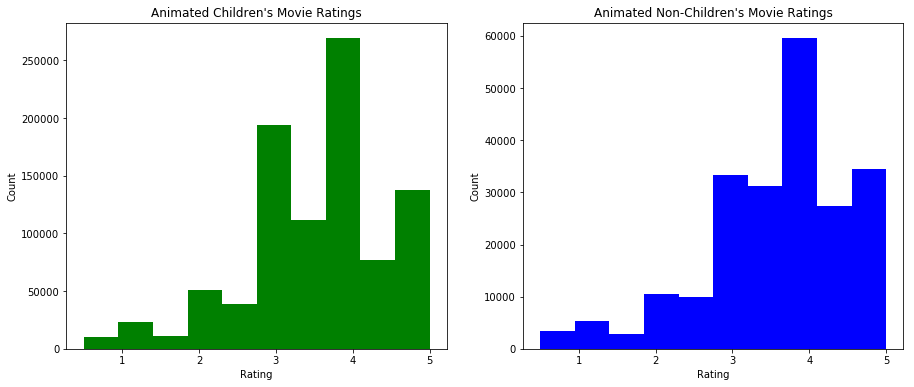

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6)) # 2 resulting objects

#plt.subplot(1,2,1)

axes[0].hist(animated_children['rating'], 10, normed = False, facecolor = 'green')
# label the axis and title the plot
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].set_title('Animated Children\'s Movie Ratings') # More on color options later
#axes[0].grid(True)

axes[1].hist(animated_non_children['rating'], 10, normed = False, facecolor = 'blue')
# label the axis and title the plot
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')
axes[1].set_title('Animated Non-Children\'s Movie Ratings') # More on color options later
#axes[1].grid(True)

plt.show()

So, both of these datasets are *not* normally distributed, and in fact are left/negatively-skewed. Therefore, the mean is most likely not the best measure of center for my analysis. 

There are a couple of options to go forward with not, and one would be to do a **logarithmic transformation** of the ratings field to try and get a normal distribution out of it.

Let's try that now.

In [67]:
import warnings
warnings.filterwarnings('ignore') 

animated_children['rating_log'] = np.log10(animated_children.loc[:,'rating'])
animated_children.head(5)

,movieId,title,genres,rating,timestamp,rating_log
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,944919407,0.602060
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,858275452,0.698970
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,833981871,0.602060
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,943497887,0.602060
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1230858821,0.653213


In [68]:
animated_non_children['rating_log'] = np.log10(animated_non_children.loc[:,'rating'])
animated_non_children.head(5)

,movieId,title,genres,rating,timestamp,rating_log
107829,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1.0,992545537,0.00000
107830,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1.0,868840936,0.00000
107831,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,4.0,1131798793,0.60206
107832,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,5.0,875922590,0.69897
107833,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,5.0,846421792,0.69897


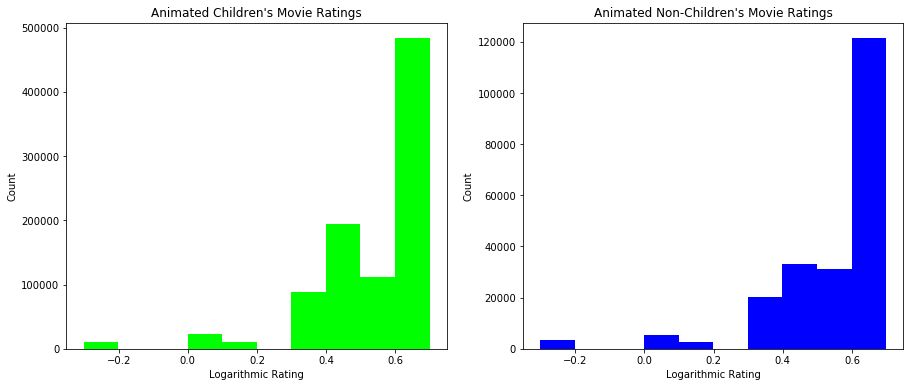

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6)) # 2 resulting objects

#plt.subplot(1,2,1)

axes[0].hist(animated_children['rating_log'], 10, normed = False, facecolor = 'lime')
# label the axis and title the plot
axes[0].set_xlabel('Logarithmic Rating')
axes[0].set_ylabel('Count')
axes[0].set_title('Animated Children\'s Movie Ratings') # More on color options later
#axes[0].grid(True)

axes[1].hist(animated_non_children['rating_log'], 10, normed = False, facecolor = 'blue')
# label the axis and title the plot
axes[1].set_xlabel('Logarithmic Rating')
axes[1].set_ylabel('Count')
axes[1].set_title('Animated Non-Children\'s Movie Ratings') # More on color options later
#axes[1].grid(True)

plt.show()

Oh my goodness, so that didn't work at all. It actually seemed to make it *worse*. 

Instead, I'm going to create sampling distributions of each dataset via a function to take 

In [82]:
def create_sampling_distribution(df,listArg):
    i = 0
    while (i < 200):
        x = np.array(df['rating'].sample(n=100)).mean()
        listArg.append(float(round(x,2)))
        i += 1
#children_means[:5]

In [96]:
children_means = []
non_children_means = []

create_sampling_distribution(animated_children,children_means)
create_sampling_distribution(animated_non_children,non_children_means)
#len(non_children_mean)

In [78]:
children_means[:5]

[3.61, 3.56, 3.64, 3.6, 3.74]

In [97]:
non_children_means[:5]

[3.61, 3.92, 3.64, 3.69, 3.63]

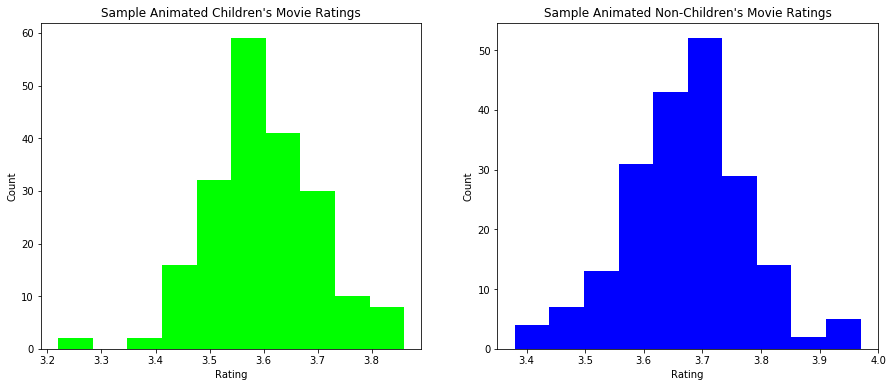

In [141]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6)) # 2 resulting objects

#plt.subplot(1,2,1)

axes[0].hist(children_means, 10, normed = False, facecolor = 'lime')
# label the axis and title the plot
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].set_title('Sample Animated Children\'s Movie Ratings') # More on color options later
#axes[0].grid(True)

axes[1].hist(non_children_means, 10, normed = False, facecolor = 'blue')
# label the axis and title the plot
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')
axes[1].set_title('Sample Animated Non-Children\'s Movie Ratings') # More on color options later
#axes[1].grid(True)

plt.show()
fig.savefig('animatedMovieSamplingDistributions.png')

Okay, cool, so these samples now seem relatively normal, and we can work with these in a **independent samples t-test** to see if these 2 distributions differ in a significant amount.

In [128]:
# mu is from population = all animated movies
x_children = round(float(np.float64(children_means).mean()),3)
x_adult = round(float(np.float64(non_children_means).mean()),3)

degFreedom = (len(children_means) + len(non_children_means)) - 2

s_children = round(float(np.float64(children_means).std()),3)
s_adult = round(float(np.float64(non_children_means).std()),3)

stdErr = round(math.sqrt(s_children**2/len(children_means)) + (s_adult**2/len(non_children_means)),4)

t = (x_children - x_adult)/stdErr

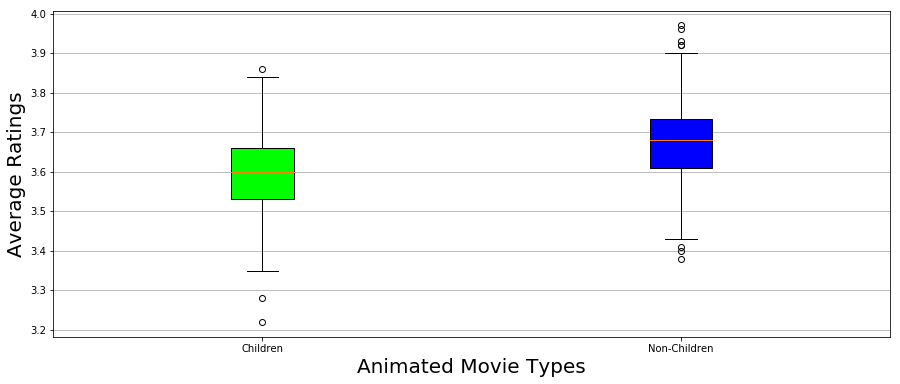

Mean of Sample of Animated Children's Movies: 3.6
Standard Deviation of Sample of Animated Children's Movies: 0.102 

Mean of Sample of Animated Adult Movies: 3.67
Standard Deviation of Sample of Adult Children's Movies: 0.104 

Degrees of Freedom: 398


In [137]:
fig, axes = plt.subplots(figsize=(15,6))

data = [children_means, non_children_means]

# Box plot: Notch Shape
bplot1 = axes.boxplot(data, vert = True, patch_artist = True)

colors = ['lime', 'blue']
# more colors here: http://matplotlib.org/examples/color/named_colors.html

for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
        
axes.yaxis.grid(True)
axes.set_xlabel('Animated Movie Types',fontsize=20)
axes.set_ylabel('Average Ratings',fontsize=20)
   
# Xtick labels
plt.setp(axes, xticklabels=['Children', 'Non-Children'])

plt.show()
fig.savefig("animated_movies_boxplot.png")

print("Mean of Sample of Animated Children's Movies:",x_children)
print("Standard Deviation of Sample of Animated Children's Movies:",s_children,'\n')

print("Mean of Sample of Animated Adult Movies:",x_adult)
print("Standard Deviation of Sample of Adult Children's Movies:",s_adult,'\n')

print("Degrees of Freedom:",degFreedom)

The mean average rating for animated childrens' movies is a bit lower, and there's a miniscule difference in standard deviations of both rating sampling distributions.

Now, with the degrees of freedom being quite high at 398, we'd need to look at the highest df value in a t-table for an alpha level of 0.05 to get the 95% confidence level in our statement that the null hypothesis can be rejected.

In [130]:
print("t-test Value: ",round(t,2))

t-test Value:  -9.59


<img src="./t-table_values.PNG" align="center" style="width:650px;height:750px;"/>

Sigsig